<a href="https://colab.research.google.com/github/Mandred009/Freelance-Gigs/blob/main/Pollution_Freelan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [256, 256]

train_path = '/content/drive/MyDrive/Freelancing/figuredata'

In [ ]:
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=(256,256,3), weights='imagenet', include_top=False)

In [ ]:
import tensorflow as tf

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
model = tf.keras.Sequential([
    inception,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(1, activation = 'linear', name = 'Output_layer')
])

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='mean_absolute_error',
  optimizer='adam',
  metrics=['mean_absolute_error']
)

In [ ]:
import cv2 as cv
import os

In [ ]:
path='/content/drive/MyDrive/Freelancing/figuredata'

In [ ]:
img_size = 256
def get_data(data_dir):
    data = [] 
    flag=False

    for img in os.listdir(path):
        try:
            img_arr = cv.imread(os.path.join(path, img)) #[...,::-1] #convert BGR to RGB format #optional
            resized_arr = cv.resize(img_arr, (img_size, img_size)) #reshape
            im_rgb = cv.cvtColor(resized_arr, cv.COLOR_BGR2RGB)
            data.append(im_rgb)
        except Exception as e:
            print(e)
    return np.array(data)

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Freelancing/PM2.5data.csv')

In [ ]:
y=df.drop(columns=['fileName'])

In [ ]:
y=np.array(y['PM25'])

In [ ]:
training_setX =get_data(path)

In [ ]:
training_setX=training_setX/255.0

In [ ]:
training_sety=y

In [ ]:
import matplotlib.pyplot as plt

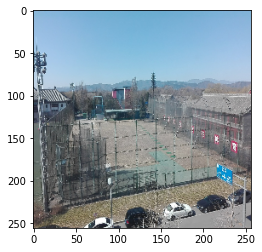

In [ ]:
plt.imshow(training_setX[0])

In [ ]:
test_setX = training_setX[190:]

In [ ]:
test_sety=y[190:]

In [ ]:
np.shape(training_setX)

(206, 256, 256, 3)

In [ ]:
model.fit(training_setX,training_sety,epochs=10)

Epoch 1/10
7/7 [==============================] - 7s 213ms/step - loss: 107.9123 - mean_absolute_error: 107.9123
Epoch 2/10
7/7 [==============================] - 1s 198ms/step - loss: 68.6888 - mean_absolute_error: 68.6888
Epoch 3/10
7/7 [==============================] - 1s 197ms/step - loss: 68.8564 - mean_absolute_error: 68.8564
Epoch 4/10
7/7 [==============================] - 1s 196ms/step - loss: 66.2563 - mean_absolute_error: 66.2563
Epoch 5/10
7/7 [==============================] - 1s 197ms/step - loss: 61.4598 - mean_absolute_error: 61.4598
Epoch 6/10
7/7 [==============================] - 1s 195ms/step - loss: 59.1161 - mean_absolute_error: 59.1161
Epoch 7/10
7/7 [==============================] - 1s 197ms/step - loss: 58.0023 - mean_absolute_error: 58.0023
Epoch 8/10
7/7 [==============================] - 1s 197ms/step - loss: 55.2773 - mean_absolute_error: 55.2773
Epoch 9/10
7/7 [==============================] - 1s 196ms/step - loss: 53.2858 - mean_absolute_error: 53.2858

In [ ]:
y_pred = model.predict(test_setX)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
sqrt(mean_squared_error(test_sety,y_pred))

4.541071134585245

In [ ]:
def predictor(img_path):
  img_arr = cv.imread(img_path)
  resized_arr = cv.resize(img_arr, (img_size, img_size)) #reshape
  im_rgb = cv.cvtColor(resized_arr, cv.COLOR_BGR2RGB)
  X=im_rgb/255.
  plt.imshow(im_rgb)
  X=X.reshape(1,256,256,3)
  pred=model.predict(X)
  if pred>0 and pred<=50:
    print('Good Air Quality')
    print("PM 2.5 is: ",pred[0])
  elif pred<=100:
    print('Moderate Air Quality')
    print("PM 2.5 is: ",pred[0])
  elif pred<=150:
    print('Unhealthy Air Quality')
    print("PM 2.5 is: ",pred[0])
  elif pred<=200:
    print('Very Unhealthy Air Quality')
    print("PM 2.5 is: ",pred[0])
  elif pred<=300:
    print('Dangerous Air Quality')
    print("PM 2.5 is: ",pred[0])
  else:
    print('Hazardous Air Quality')
    print("PM 2.5 is: ",pred[0])

In [ ]:
pathpred='/content/drive/MyDrive/Freelancing/figuredata/201703090830.jpg'

Moderate Air Quality
PM 2.5 is:  [59.595318]


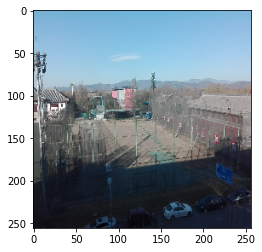

In [ ]:
predictor(pathpred)